<a href="https://colab.research.google.com/github/ErrantCoast/next-seo/blob/master/Keyword_clusting_based_on_SERP_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hi** there! 👋

Thanks for attending my presentation at BrightonSEO and cool that you want to get started with automation. If you don't quite understand it or have any questions you can contact me via [X (Twitter)](https://x.com/frankvndijk), [LinkedIn](https://www.linkedin.com/in/frankvndijk/) or send an email to frankvandijk@maatwerkonline.nl.

The Excel you are going to upload must have this base:

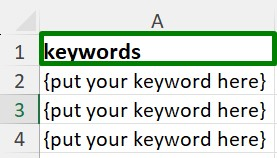

Scroll down to give your input.

In [ ]:
from google.colab import files
import io
import pandas as pd
import requests

uploaded = files.upload()

for fn in uploaded.keys():
      print('You have uploaded a file'.format(
      name=fn, length=len(uploaded[fn])))

language = input('Enter here the country code of the Google domain you want to use, watchout for the dot (Eg: co.uk, com, nl)')
API_KEY_SERPAPI = input('Add your API key from SerpAPI')


def getting_keywords():
    excel_filename = next(iter(uploaded))
    df = pd.read_excel(excel_filename)
    cell_values_as_strings = df.astype(str).values.flatten().tolist()
    return cell_values_as_strings

def scraping_and_clustering(keywords):
    serp_data = []
    for keyword in keywords:
        params = {
            "q": keyword,
            "google_domain": f"google.{language}",
            # "hl": f"{language}",
            # "gl": f"{language}",
            "api_key": API_KEY_SERPAPI,
        }
        response = requests.get(url="https://serpapi.com/search", params=params)
        data = response.json()
        serp_data.append(data)
    full_serp = {}
    amount = 0
    for info in serp_data:
        current_serp = serp_data[amount]
        amount += 1
        keyword = current_serp["search_parameters"]["q"]
        rankings = []
        for position in range(0, 9):
            if position >= len(current_serp["organic_results"]):
                break
            rankings.append(current_serp["organic_results"][position]["link"])
        full_serp[keyword] = rankings
    clustered_keywords = {}
    keyword_searched = set()
    for current_keyword, current_url in full_serp.items():
        if current_keyword in keyword_searched:
            continue
        keyword_searched.add(current_keyword)
        clustered_keywords[current_keyword] = [current_keyword]
        for compared_keyword, compared_url in full_serp.items():
            if compared_keyword == current_keyword or compared_keyword in keyword_searched:
                continue
            agreements = len(set(current_url) & set(compared_url))
            if agreements >= 3:
                clustered_keywords[current_keyword].append(compared_keyword)
                keyword_searched.add(compared_keyword)
    output_list = [{'topic': key, 'keywords': value} for key, value in clustered_keywords.items()]

    return output_list

def downloading_in_excel(data):
    expanded_data = []
    for item in data:
        for keyword in item['keywords']:
            expanded_data.append({'Main keyword': item['topic'], 'Sub keywords': keyword})
    df = pd.DataFrame(expanded_data)
    file_name = 'clustered_keywords.xlsx'
    df.to_excel(file_name, index=False)
    files.download(file_name)


keywords = getting_keywords()
clusterd_keywords = scraping_and_clustering(keywords)
downloading_in_excel(clusterd_keywords)

Saving 500 keywords for clustering.xlsx to 500 keywords for clustering.xlsx
You have uploaded a file
Enter here the country code of the Google domain you want to use, watchout for the dot (Eg: co.uk, com, nl)co.uk
Add your API key from SerpAPIbee38790bbf2349b6258c82a5a83fa8e3ae27583e130d7f026c124c3ffa97a52


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>